In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Alunas: 
*   Milena Lucas dos Santos
*   Raianny Proença de C. Oliveira
*   Vivian Miwa Fugihara

# Fontes dos dados

Os datasets sobre a dengue foram retirados do DataSUS (Departamento de Informática do SUS) [1], e os dados sobre o clima foram retirados do BDMEP (Banco de Dados Meteorológicos para Ensino e Pesquisa) [2]. Foi escolhido os anos de 2014 à 2020.



# Tratamento dos dados de clima

Para baixar o dataset do BDMEP foram especificadas as seguintes variáveis:
*   Tipo de pontuação: ponto;
*   Tipo de dados: diários;
*   Tipo de estação: automáticas;
*   Abrangência: região;
*   Data início: 01/01/2014;
*   Data fim: 31/12/2020;
*   Regiões: sul (apenas cidades do Paraná);
*   Variáveis: 
    *   Precipitação total diário;
    *   Pressão atmosférica média diária;
    *   Temperatura do ponto de orvalho média diária;
    *   Temperatura máxima diária;
    *   Temperatura média diária;
    *   Temperatura mínima diária;
    *   Umidade relativa do ar média diária;
    *   Umidade relativa do ar mínima diária;
    *   Vento rajada máxima diária;
    *   Vento velocidade média diária.

O objetivo era coletar os dados diários do clima e relacioná-los com os casos de dengue, que estavam divididos em semanas epidemológicas. Para isso, seria necessário converter os dias em semanas a fim de torná-los compatíveis para a análise.

No entanto, ao baixar o conjunto de dados do DataSUS para cada município, percebeu-se que haviam poucos casos, assim, optou-se por trabalhar com meses. Para tal, foi necessário baixar novamente o dataset da BDMEP, desta vez com o tipo de dados "meses". Além disso, foi preciso definir o tipo de pontuação como "vírgula", pois as temperaturas estavam sendo representada em milhões.

Também retiramos algumas variáveis como a umidade relativas do ar, pois ela não constava no relatório mensal, a pressão atmosférica e o vento, visto que estas não possuiam muita relevância com o que gostaríamos de trabalhar. No final, as variáveis escolhidas foram:
*   Temperatura média mensal;
*   Precipitação total mensal;
*   Número de dias com precipitação.

Os conjuntos de dados estavam dispostos como um arquivo csv para cada município, ou seja, havia uma tabela para cada município. Como foram adquiridos poucos municípios, resolvemos baixar também os dados do tipo de estação "convencional", a fim de aumentar a quantidade de cidades a serem trabalhadas.

Alguns municípios não possuíam informações de alguns meses de 2020 e de anos anteriores à 2016, e para contornar isso inserimos nas tabelas de cada município as informações que faltavam sobre a precipitação, baseando-se no site [3]. Para completar as temperaturas faltantes foi utilizado o site [4], e no caso de não ter informações sobre determinado município no site, fez-se uma média simples do mês do anos anterior e posterior ao mês que faltava.





# Tratamento dos dados de dengue

O conjunto de dados da dengue foi baixado como um csv que contém o número de casos dos municípios do Paraná, em cada mês, para cada ano. Desse modo, gerou-se um arquivo para cada ano.

Como dito anteriormente, inicialmente o dataset foi baixado como "semana epidemológica 1ºs sintomas", sendo substituído posteriormente por "mês notificação". O conteúdo selecionado foi "classificação final: dengue".
Como haviam municípios que possuíam valores nulos em determinados anos, optou-se por substituir "null" por "0".

Os municípios que não constavam no dataset meteorológico foram excluídos da tabela, junto com aqueles que possuíam muitos valores nulos, restando ao todo 19 municípios:
*   Cidade Gaucha
*   Colombo
*   Curitiba
*   Diamante do Norte
*   Dois Vizinhos
*   Foz do Iguaçu
*   Icaraíma
*   Irati
*   Joaquim Távora
*   Londrina
*   Marechal Cândido Rondon
*   Maringá
*   Morretes
*   Nova Fátima
*   Nova Tebas
*   Paranaguá
*   Paranapoema
*   Planalto
*   São Mateus do Sul

Além disso, foi criada outra tabela para cada município, contendo os dados de clima e de dengue como colunas, para testar a correlação de spearman, que será demonstrada posteriormente. 

Por fim, foi feito também uma tabela contendo o número de casos total de todos os municípios em todos os anos, a fim de comparar a quantidade de casos em cada ano.  


# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Correlação de Spearman

Para demonstrar a relação entre o clima e o número de casos de dengue, foi escolhido o coeficiente de correlação de Spearman, que mede o grau de correlação entre duas variáveis.

In [ ]:
curitiba_dados = pd.read_csv('/content/drive/MyDrive/trabalho1CD/dados_municipio/curitiba_clima_dengue.csv', sep = ';', skiprows=10)
curitiba_dados

,data_medicao,precipitacao_dias,precipitacao_total,temperatura_media,casos_dengue
0,31/01/2014,15,"243,2",23,4
1,28/02/2014,16,"110,6",23,7
2,31/03/2014,18,"214,8",20,7
3,30/04/2014,18,76,18,14
4,31/05/2014,15,"84,8",16,15
...,...,...,...,...,...
79,31/08/2020,12,"136,4",16,0
80,30/09/2020,4,"37,8",19,1
81,31/10/2020,13,"128,2",19,1
82,30/11/2020,16,"211,8",19,1


In [ ]:
curitiba_dados.corr("spearman")

,precipitacao_dias,temperatura_media,casos_dengue
precipitacao_dias,1.000000,0.426098,0.229247
temperatura_media,0.426098,1.000000,0.327768
casos_dengue,0.229247,0.327768,1.000000


Como pode-se perceber, o grau de correlação entre os casos de dengue e o número de dias em que choveu em Curitiba é de aproximadamente 23%, sendo considerado uma porcentagem baixa. A correlação entre a temperatura média e os casos de dengue também foi baixa, com aproximadamente 33%.

Acredita-se que um dos motivos disso deve-se ao fato que há muitos dados faltantes que tiveram que ser supridos. 

# Top 5 municípios com maiores casos

Os 5 municípios que mais notificaram casos de dengue entre os anos de 2014 e 2020 foram Londrina (38227), Foz do Iguaçu (33975), Maringá (24414), Paranaguá (17846) e Marechal Cândido Rondon (2564).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


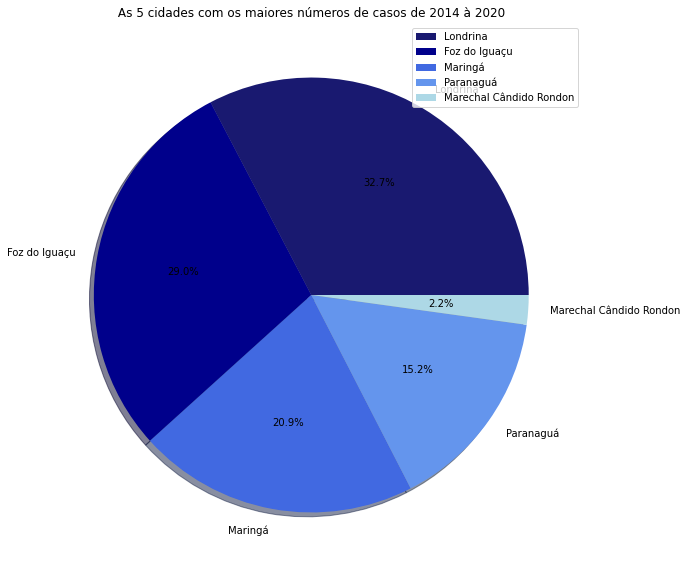

In [ ]:
plt.figure(figsize=(10,10))
total_cidades_top5= pd.read_csv('/content/drive/MyDrive/trabalho1CD/total_cidades_top5.csv', sep = ';', encoding = 'latin-1')

labels = ['Londrina', 'Foz do Iguaçu', 'Maringá', 'Paranaguá', 'Marechal Cândido Rondon']
values = [total_cidades_top5['Londrina'][7:], total_cidades_top5['Foz do Iguaçu'][7:], total_cidades_top5['Maringá'][7:], total_cidades_top5['Paranaguá'][7:], total_cidades_top5['Marechal Cândido Rondon'][7:]]
cores = ['midnightblue', 'darkblue', 'royalblue', 'cornflowerblue', 'lightblue']
plt.pie(values,labels= labels, colors = cores, autopct = '%.1f%%', shadow = True)
plt.title(' As 5 cidades com os maiores números de casos de 2014 à 2020 ')
plt.legend()
plt.show()

A seguir, para melhor visualização do crescimento de casos, a animação mostra os municípios com maior quadro de dengue, no decorrer de cada ano.


In [ ]:
!pip install bar_chart_race

In [ ]:
import bar_chart_race as bcr

total_cidades_top5= pd.read_csv('/content/drive/MyDrive/trabalho1CD/total_cidades_top5.csv', sep = ';', encoding = 'latin-1')
total_cidades_top5 = total_cidades_top5.set_index('ano')
bcr.bar_chart_race(df = total_cidades_top5, period_length = 2000 , bar_size= 1, title = '5 cidades com o maior número de casos de Dengue') # period_lenght tempo em milisegundos


# Casos de dengue de 2016

O ano de 2016 foi registrado como um dos maiores picos de dengue. Curiosamente, na metade do ano os casos abaixaram drasticamente, e com base em pesquisas realizadas, um dos motivos deve-se pela primeira vacinação contra a dengue, que iniciou-se em Agosto de 2016 e foi distribuída inicialmente no Paraná.

“O Paraná iniciou a oferta da vacina em agosto de 2016, no ano em que o Estado enfrentou sua pior epidemia, com o registro de mais de 56 mil casos e 63 mortes por dengue.” [5]

Desse modo, os anos seguintes, como 2017 e 2018, tiveram poucos casos.

# Total de casos de dengue de 2014 à 2020

A seguir serão representados os casos de dengue do Paraná, nos anos de 2014 à 2020, a fim de descobrir qual foi o maior pico de notificação de dengue da história.

In [ ]:
total_2014a2020 = pd.read_csv('/content/drive/MyDrive/trabalho1CD/total_2014a2020.csv', sep = ';', encoding = 'latin-1')

meses = total_2014a2020['Mês'][:12]
total_2014a2020

,Mês,2014,2015,2016,2017,2018,2019,2020,Total
0,Jan,266,161,4799,40,19,132,5365,10782
1,Fev,1197,352,9300,30,17,596,19148,30640
2,Mar,2089,1486,9739,29,20,918,25261,39542
3,Abr,1333,2868,6579,17,33,1928,13153,25911
4,Mai,687,2012,1166,26,31,3172,3858,10952
5,Jun,109,762,189,21,11,1134,1654,3880
6,Jul,55,204,102,21,5,391,692,1470
7,Ago,35,121,29,36,8,145,303,677
8,Set,32,59,27,70,5,139,100,432
9,Out,21,92,55,45,13,232,119,577


In [ ]:
total_2014 = total_2014a2020['2014'][:12]
total_2015 = total_2014a2020['2015'][:12]
total_2016 = total_2014a2020['2016'][:12]
total_2017 = total_2014a2020['2017'][:12]
total_2018 = total_2014a2020['2018'][:12]
total_2019 = total_2014a2020['2019'][:12]
total_2020 = total_2014a2020['2020'][:12]

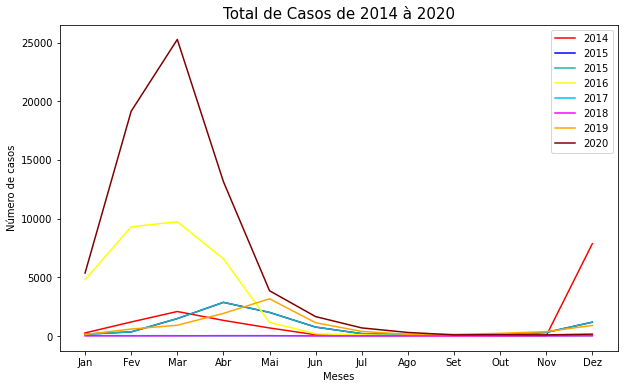

In [ ]:
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6) # escala do gráfico
plt.plot(meses, total_2014, label = "2014",color = 'red')
plt.plot(meses, total_2015, label = "2015", color = 'blue')
plt.plot(meses, total_2015, label = "2015",color = 'lightseagreen')
plt.plot(meses, total_2016, label = "2016",color = 'yellow')
plt.plot(meses, total_2017, label = "2017",color = 'deepskyblue')
plt.plot(meses, total_2018, label = "2018",color = 'magenta')
plt.plot(meses, total_2019, label = "2019",color = 'orange')
plt.plot(meses, total_2020, label = "2020",color = 'maroon')

plt.legend()
plt.title('Total de Casos de 2014 à 2020', fontsize=15)
plt.ylabel('Número de casos')
plt.xlabel('Meses')

plt.show()

Pode-se perceber que o ano em que ocorreu o maior pico de casos de dengue no Paraná foi 2020. Há várias variáveis que podem ter influenciado essa problemática, sendo uma delas a alteração no sorotipo mais predominante do vírus da dengue.

Há quatro sorotipos conhecidos até hoje, sendo eles o DENV-1, DENV-2, DENV-3 e DENV-4. Sempre existe um sorotipo que é mais predominante em uma determinada região, que pode ser alternado em questão de meses. O indivíduo que for contaminado com o vírus da dengue de um certo sorotipo, acaba criando imunidade contra ele, mas não fica imune dos demais. Desse modo, uma pessoa pode pegar dengue até quatro vezes na vida, e todos os sorotipos podem caminhar para um estado mais grave, que é a dengue hemorrágica.

"A mudança do sorotipo mais predominante pode ocasionar uma nova epidemia, pois o vírus pode encontrar uma população que não possui imunidade contra ele e torná-la alvo. Em 2019 o sorotipo predominante foi o 2, que deu continuidade até 2020, sendo detectado 79,7% nos exames laboratoriais." [6]

Assim, além da alternância do sorotipo predominante, pressupõe-se que outra causa do aumento de casos de 2020 foi a diminuição da procura de vacinação, em decorrência do início da pandemia do covid-19, que exigiu que a população permanecesse ao máximo em suas casas e que os profissionais fiscalizadores da dengue não pudessem entrar nas casas.


# Casos de dengue Foz do Iguaçu

In [ ]:
fozdoiguacu = pd.read_csv('/content/drive/MyDrive/trabalho1CD/fozdoiguacuMesporAno.csv', sep = ';', encoding = 'latin-1')


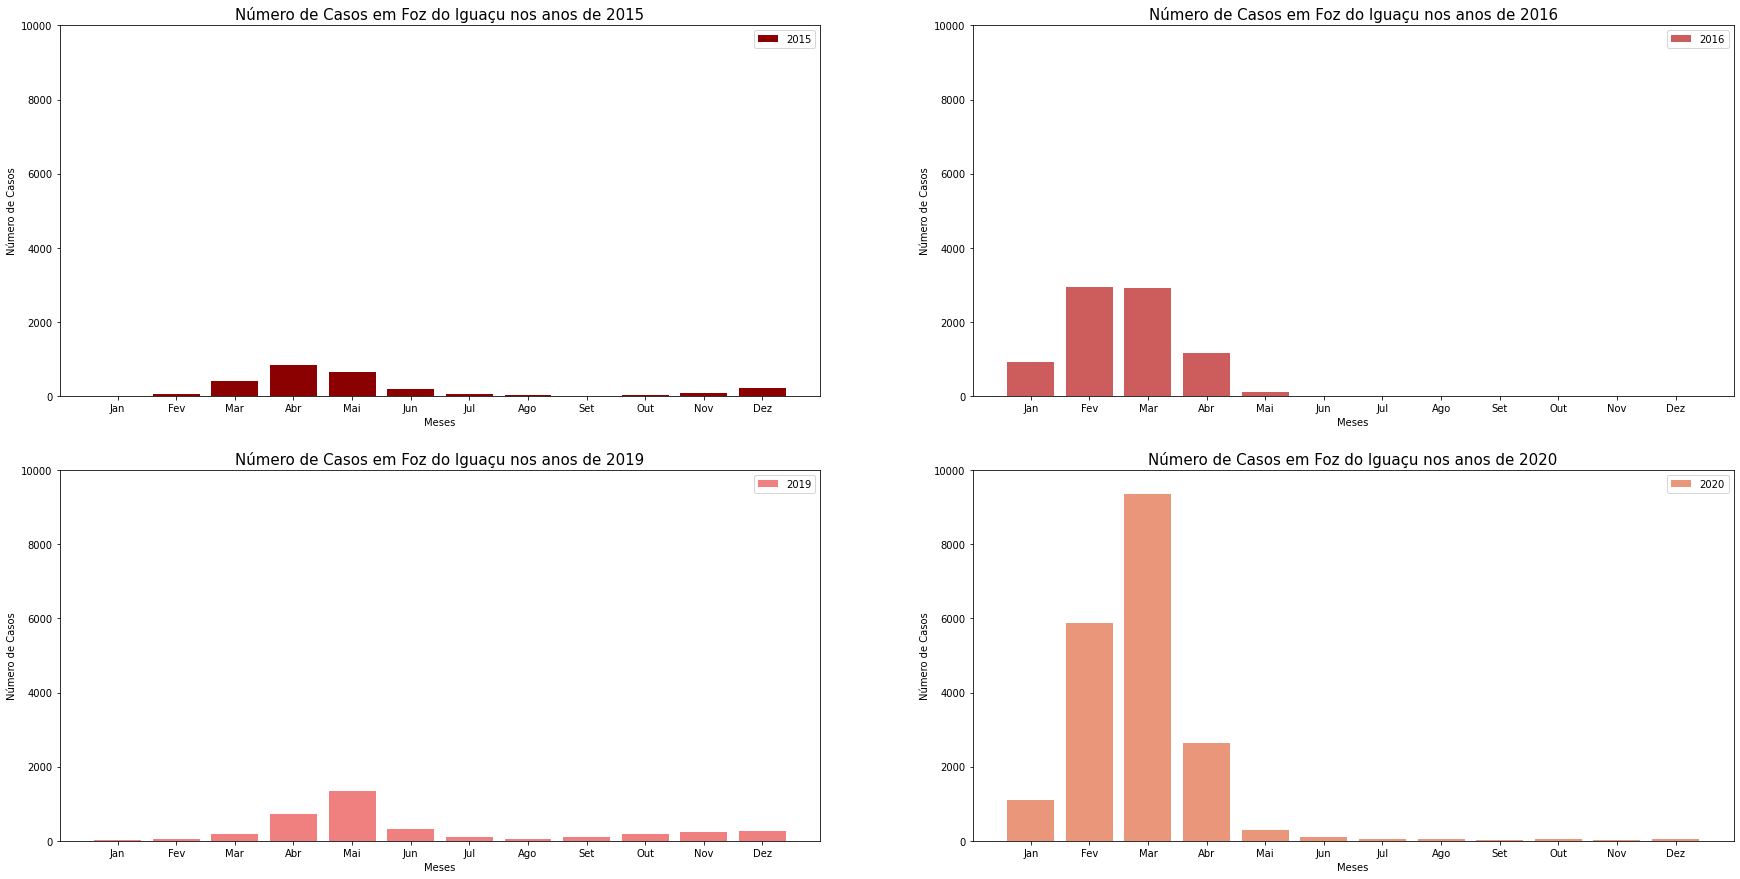

In [ ]:
meses = fozdoiguacu['Mes']

foz2015 = fozdoiguacu['2015']
foz2016 = fozdoiguacu['2016']
foz2019 = fozdoiguacu['2019']
foz2020 = fozdoiguacu['2020']

%matplotlib inline 

plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.ylim(0, 10000)
plt.bar(meses, foz2015, label = "2015", color='darkred')
plt.legend()
plt.title('Número de Casos em Foz do Iguaçu nos anos de 2015', fontsize=15)
plt.ylabel('Número de Casos')
plt.xlabel('Meses')

plt.subplot(2, 2, 2)
plt.ylim(0, 10000)
plt.bar(meses, foz2016, label = "2016", color = 'indianred')
plt.legend()
plt.title('Número de Casos em Foz do Iguaçu nos anos de 2016', fontsize=15)
plt.ylabel('Número de Casos')
plt.xlabel('Meses')

plt.subplot(2, 2, 3)
plt.ylim(0, 10000)
plt.bar(meses, foz2019, label = "2019", color = 'lightcoral')
plt.legend()
plt.title('Número de Casos em Foz do Iguaçu nos anos de 2019', fontsize=15)
plt.ylabel('Número de Casos')
plt.xlabel('Meses')

plt.subplot(2, 2, 4)
plt.ylim(0, 10000)
plt.bar(meses, foz2020, label = "2020", color = 'darksalmon')
plt.legend()
plt.title('Número de Casos em Foz do Iguaçu nos anos de 2020', fontsize=15)
plt.ylabel('Número de Casos')
plt.xlabel('Meses')

plt.show()

Foz do Iguaçu teve um dos maiores casos do Paraná dentre os anos de 2014 à 2020, estando apenas atrás de Londrina, e localiza-se no Oeste do estado, onde se concentra o maior quadro de dengue. Por ser uma região úmida com altas temperaturas, isso acaba influenciando o aumento de casos.

# Casos de dengue no Paraná em cada estação do ano

A estação do ano em que há mais notificações do vírus é o verão, visto que é quando o clima está mais quente, ou seja, a temperatura está elevada e propícia para a propagação de dengue, além das chuvas e umidade alta que também influenciam. Isso pode ser observado no gráfico a seguir, que mostra o número de casos total do Paraná no verão, outono, inverno e primavera.

In [ ]:
casos_verao = total_2014a2020['Total'].iloc[0:3].sum() # Jan, Fev, Mar
casos_outono = total_2014a2020['Total'].iloc[3:6].sum() # Abr, Mai, Jun
casos_inverno = total_2014a2020['Total'].iloc[6:9].sum() # Jul, Ago, Set
casos_primavera = total_2014a2020['Total'].iloc[9:12].sum() # Out, Nov, Dez

In [ ]:
estacoes = ['Verão', 'Outono', 'Inverno', 'Primavera'] 
casos = [casos_verao, casos_outono, casos_inverno, casos_primavera]
bar_color = ['lightsalmon', 'khaki', 'skyblue', 'palegreen'] # cor das barras

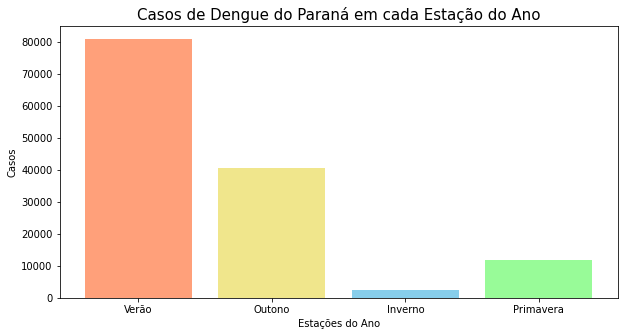

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(estacoes, casos, color = bar_color) # eixo x: casos, eixo y: estações
plt.xlabel('Estações do Ano')
plt.ylabel('Casos')
plt.title('Casos de Dengue do Paraná em cada Estação do Ano', fontsize=15)
plt.show()

No verão, o número de casos chegou a 80964 em todos esses anos, no outono teve 40743, no inverno, 2579, e na primavera, 11672 casos em todo o estado.

# Casos futuros

O sorotipo predominante era o 2 até 2019. No entanto, novas pesquisas sugerem que a dengue do tipo 1 está aparecendo significativamente nos exames laboratoriais desde o ano de 2020.

“O Distrito Federal e o estado de Goiás voltaram a registrar circulação expressiva do sorotipo 1 da dengue, no ano de 2020. No DF, este ano, 92,3% das amostras analisadas registraram a presença do tipo, contra 28,9%, no ano passado. Já em Goiás, os dados epidemiológicos apontam que a presença do sorotipo 1 da doença passou de 2% para 30%, entre 2019 e 2020”. [7]

Desse modo, como o sorotipo 1 está se tornando cada vez mais predominante, atualmente ou futuramente pode ocorrer outra epidemia de casos, visto que o sorotipo predominante está se alterando novamente. 


# Referências

[1] DATASUS. DATASUS. Disponível em: <http://www2.datasus.gov.br/DATASUS/>. Acesso em: 20 mar. 2021.

[2] INMET :: BDMEP. Disponível em: <https://bdmep.inmet.gov.br/>. Acesso em: 24 mar. 2021.

[3] SIH - Sistema de Informações Hidrológicas. Disponível em: <http://www.sih-web.aguasparana.pr.gov.br/sih-web/>. Acesso em: 1 abr. 2021.

[4] Previsão do Tempo para 14 dias - tempo.com. Disponível em: <https://www.tempo.com/>. Acesso em: 1 abr. 2021.‌

[5] AGÊNCIA ESTADUAL DE NOTÍCIAS DO ESTADO DO PARANÁ, Paraná encerra o ciclo de oferta da vacina contra dengue, Agência Estadual de Notícias, disponível em: <http://www.aen.pr.gov.br/modules/noticias/article.php?storyid=99404#:~:text=No%20total%2C%20o%20Paran%C3%A1%20imunizou,que%20iniciaram%20seu%20esquema%20vacinal.>, acesso em: 3 Apr. 2021.

[6] FOLHA DE S.PAULO. Após sua pior epidemia de dengue em 2019, Paraná já ultrapassou a média histórica em 2020. Disponível em: <https://www1.folha.uol.com.br/cotidiano/2020/10/apos-sua-pior-epidemia-de-dengue-em-2019-parana-ja-ultrapassou-a-media-historica-em-2020.shtml>. Acesso em: 3 abr. 2021.

[7] MOURA, F. Dengue: Estados voltam a registrar circulação significativa do sorotipo 1. Disponível em: <https://brasil61.com/noticias/dengue-estados-voltam-a-registrar-circulacao-significativa-do-sorotipo-1-bras202128>. Acesso em: 3 abr. 2021.
